<a href="https://colab.research.google.com/github/SausageSamurai/CompAlg/blob/main/compAlg3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def add(x, y): return ['+', x, y]
def sub(x, y): return ['-', x, y]
def mul(x, y): return ['*', x, y]
def div(x, y): return ['/', x, y]
def power(x, y): return ['^', x, y]
def negative(x): return ['~', x]
def sin_(x): return ['sin', x]
def cos_(x): return ['cos', x]
def sqrt_(x): return ['sqrt', x]




def tan_(x): return ['tan', x]
def arcsin_(x): return ['arcsin', x]
def arccos_(x): return ['arccos', x]
def arctan_(x): return ['arctan', x]
def sh_(x): return ['sh', x]
def ch_(x): return ['ch', x]
def th_(x): return ['th', x]
def ash_(x): return ['ash', x]
def ach_(x): return ['ach', x]
def ath_(x): return ['ath', x]


def fix(x):
    if isinstance(x, Expression):
        return x
    return Expression(x)


class Expression:
    def __init__(self, x):
        self.T = x

    def __add__(self, x):
        return Expression(add(self.T, fix(x).T))

    def __radd__(self, x):
        return Expression(add(fix(x).T, self.T))

    def __sub__(self, x):
        return Expression(sub(self.T, fix(x).T))

    def __rsub__(self, x):
        return Expression(sub(fix(x).T, self.T))

    def __mul__(self, x):
        return Expression(mul(self.T, fix(x).T))

    def __rmul__(self, x):
        return Expression(mul(fix(x).T, self.T))

    def __truediv__(self, x):
        return Expression(div(self.T, fix(x).T))

    def __rtruediv__(self, x):
        return Expression(div(fix(x).T, self.T))

    def __pow__(self, x):
        return Expression(power(self.T, fix(x).T))

    def __rpow__(self, x):
        return Expression(power(fix(x).T, self.T))

    def __neg__(self):
        return Expression(negative(self.T))



    def arccos(self):
        return Expression(np.arccos(self.T))

    def tan(self):
        return Expression(np.tan(self.T))

    def arcsin(self):
        return Expression(np.arcsin(self.T))

    def arctan(self):
        return Expression(np.arctan(self.T))

    def sh(self):
        return Expression(np.sinh(self.T))

    def ch(self):
        return Expression(np.cosh(self.T))

    def th(self):
        return Expression(np.tanh(self.T))

    def ash(self):
        return Expression(np.arcsinh(self.T))

    def ach(self):
        return Expression(np.arccosh(self.T))

    def ath(self):
        return Expression(np.arctanh(self.T))




def latex(x):
    if isinstance(x, Expression):
        return latex(x.T)

    if isinstance(x, (int, str)):
        return str(x)

    op = x[0]
    if op in '+-*/^':
        l, r = latex(x[1]), latex(x[2])
        if op == '+':
            return f'{l} + {r}'
        if op == '-':
            return f'{l} - {r}'
        if op == '*':
            return f'{l} \\cdot {r}'
        if op == '/':
            return f'\\dfrac{{{l}}}{{{r}}}'
        if op == '^':
            if isinstance(x[1], list):
                l = enclose(l)
            return f'{{{l}}}^{{{r}}}'
    else:
        a = latex(x[1])
        if op == '~':
            return f'- {a}'
        if op == 'sin':
            return f'\\sin {a}'
        if op == 'cos':
            return f'\\cos {a}'
        if op == 'sqrt':
            return f'\\sqrt{{{a}}}'
        if op == 'arcsin':
            return f'\\arcsin{{{a}}}'
        if op == 'arccos':
            return f'\\arccos{{{a}}}'
        if op == 'arctan':
            return f'\\arctan{{{a}}}'
        if op == 'tan':
            return f'\\tan{{{a}}}'

        if op == 'sh':
            return f'\\sinh{{{a}}}'
        if op == 'ch':
            return f'\\cosh{{{a}}}'
        if op == 'th':
            return f'\\tanh{{{a}}}'
        if op == 'ash':
            return f'arsinh {{{a}}}'
        if op == 'ach':
            return f'arcosh {{{a}}}'
        if op == 'ath':
            return f'artanh {{{a}}}'



def show(x):
    display(Math(latex(x)))


def enclose(x):
    return f'\\left( {x} \\right)'


def symbols(s):
    S = s.split()
    if len(S) == 1:
        return Expression(s)
    return (Expression(i) for i in S)


def sin(x):
    return Expression(sin_(fix(x).T))


def cos(x):
    return Expression(cos_(fix(x).T))


def sqrt(x):
    return Expression(sqrt_(fix(x).T))


def arcsin(x):
    return Expression(arcsin_(fix(x).T))


def arccos(x):
    return Expression(arccos_(fix(x).T))


def arctan(x):
    return Expression(arctan_(fix(x).T))


def tan(x):
    return Expression(tan_(fix(x).T))


def sh(x):
    return Expression(sh_(fix(x).T))


def ch(x):
    return Expression(ch_(fix(x).T))


def th(x):
    return Expression(th_(fix(x).T))


def ash(x):
    return Expression(ash_(fix(x).T))


def ach(x):
    return Expression(ach_(fix(x).T))


def ath(x):
    return Expression(ath_(fix(x).T))




def evalf(x, arg={}):
    if isinstance(x, Expression):
        if isinstance(arg, dict):
            arg = {i.T: arg[i] for i in arg}
        else:
            arg = {'$': arg}
        return evalf(x.T, arg)

    if isinstance(x, int):
        return x

    if isinstance(x, str):
        if x in arg:
            return arg[x]
        return arg['$']

    op = x[0]
    if op in '+-*/^':
        l, r = evalf(x[1], arg), evalf(x[2], arg)
        if op == '+':
            return l + r
        if op == '-':
            return l - r
        if op == '*':
            return l * r
        if op == '/':
            return l / r
        if op == '^':
            return l ** r
    else:
        a = evalf(x[1], arg)
        if op == '~':
            return - a
        if op == 'sin':
            return np.sin(a)
        if op == 'cos':
            return np.cos(a)
        if op == 'sqrt':
            return np.sqrt(a)
        if op == 'arcsin':
            return np.arcsin(a)
        if op == 'arccos':
            return np.arccos(a)
        if op == 'arctan':
            return np.arctan(a)
        if op == 'tan':
            return np.tan(a)
        if op == 'sh':
            return np.sinh(a)
        if op == 'ch':
            return np.cosh(a)
        if op == 'th':
            return np.tanh(a)
        if op == 'ash':
            return np.arcsinh(a)
        if op == 'ach':
            return np.arccosh(a)
        if op == 'ath':
            return np.arctanh(a)
    return None


def plotParametric(F, G, t, t1, t2):
    T = np.linspace(t1, t2, 1000)
    X = evalf(F, {t: T})
    Y = evalf(G, {t: T})
    plt.plot(X, Y)


In [3]:
x = Expression('x')
f = 2 * (x**2 + cos(x))
f.T

['*', 2, ['+', ['^', 'x', 2], ['cos', 'x']]]

In [4]:
show(f)

<IPython.core.display.Math object>

In [5]:
evalf(f, 0)

2.0

In [6]:
y = Expression('y')
g = x-y
evalf(g, {y: 1, x: 10})

9

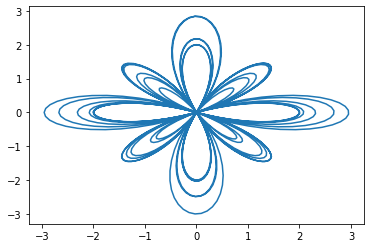

In [7]:
t = Expression('t')
F = sin(t) * ( - 2*cos(4*t) - sin(t/12)**5)
G = cos(t) * ( - 2*cos(4*t) - sin(t/12)**5)
plotParametric(F, G, t, 0, 40)

In [ ]:
print("Hello")